In [31]:
import pandas as pd
import numpy as np

In [32]:
#Data is from Prateek Agarwal

usfares = pd.read_csv("Grid view.csv")

In [33]:
usfares.head()

,City,State,Minimum Fare,Price per Minute,Price Per Mile
0,Anchorage,AK,$6.85,$0.25,$1.50
1,Fairbanks,AK,$6.85,$0.25,$1.50
2,Birmingham,AL,$5.75,$0.18,$1.26
3,Huntsville,AL,$6.15,$0.20,$1.56
4,Mobile,AL,$6.05,$0.15,$1.21


In [34]:
usfares['Minimum Fare'] = usfares['Minimum Fare'].apply(lambda x:x.replace('$','')).astype(np.float16)

In [35]:
usfares['Price per Minute'] = usfares['Price per Minute'].apply(lambda x:x.replace('$','')).astype(np.float16)

In [36]:
usfares['Price Per Mile'] = usfares['Price Per Mile'].apply(lambda x:x.replace('$','')).astype(np.float16)

In [37]:
usfares['Minimum Fare'].min(), usfares['Price per Minute'].min(), usfares['Price Per Mile'].min()

(4.0, 0.0, 0.7002)

In [38]:
usfares['Minimum Fare'].max(), usfares['Price per Minute'].max(), usfares['Price Per Mile'].max()

(10.0, 0.6001, 2.0605)

### Minimum values for 'Minimum Fare', 'Price per Minute' and 'Price Per Mile'

In [39]:
usfares.loc[usfares['Minimum Fare'].idxmin()]

City                Traverse City
State                          MI
Minimum Fare                    4
Price per Minute         0.199951
Price Per Mile           0.959961
Name: 94, dtype: object

In [40]:
usfares.loc[usfares['Price per Minute'].idxmin()]

City                Orange County
State                          CA
Minimum Fare              5.80078
Price per Minute                0
Price Per Mile           0.959961
Name: 19, dtype: object

In [41]:
usfares.loc[usfares['Price Per Mile'].idxmin()]

City                Knoxville
State                      TN
Minimum Fare          5.80078
Price per Minute     0.199951
Price Per Mile       0.700195
Name: 169, dtype: object

#### We can see here that Traverse City had the lowest Minimum Fare, Orange County had the lowest Price per Minute and Knoxville had the lowest Price Per Mile.

### Maximum values for 'Minimum Fare', 'Price per Minute' and 'Price Per Mile'

In [42]:
usfares.loc[usfares['Minimum Fare'].idxmax()]

City                The Hamptons
State                         NY
Minimum Fare                  10
Price per Minute        0.600098
Price Per Mile           1.65039
Name: 133, dtype: object

In [43]:
usfares.loc[usfares['Price per Minute'].idxmax()]

City                The Hamptons
State                         NY
Minimum Fare                  10
Price per Minute        0.600098
Price Per Mile           1.65039
Name: 133, dtype: object

In [44]:
usfares.loc[usfares['Price Per Mile'].idxmax()]

City                San Luis Obispo
State                            CA
Minimum Fare                6.05078
Price per Minute           0.290039
Price Per Mile              2.06055
Name: 24, dtype: object

#### We can see here that The Hamptons has the highest 'Minimum Fare' as well as the highest 'Price per Minute'. For the highest 'Price Per Mile' San Luis Obisbo is the winner.

##### There is a lot to observe with these aggregated statistics on three different fares. For one, across the US, there are various fares, the lowest in mostly rural or not so popular destinations. And the highest fares are in the more popular vacation spots or demographically those who would use Uber for long distances out of necessity, but there are not so many drivers such as in a college town like San Luis Obispo.  

#### Uber's pricing variability is matching local median income levels on top of demand. Inclusion of taxes in fares are unknown.

#### The advantage to Uber having locally set prices instead of fixed prices is that they are able to tailor fares based on different standard of living across the country and also different seasons of demand within a day, month or year.

### --------

# New Data EDA

## 11.12.14 US Fare Data for UberX and UberXL

In [45]:
# Credit: RideshareDashboard.com

usfares2014 = pd.read_csv("USUberFares_20141112.csv")

#### X is an Uber ride with a single passenger
#### XL is an Uber ride with multiple passengers

In [46]:
usfares2014.head()

,US_City,X_Base Fare,X_Minute,X_Mile,X_Safety,X_Min Fare,X_Cancel,XL_Base Fare,XL_Minute,XL_Mile,XL_Safety,XL_Min Fare,XL_Cancel
0,‘Akron’,2.0,0.30,1.40,1,5.0,5,0.0,0.0,0.0,0,0.0,0
1,‘Albuquerque’,1.3,0.25,1.75,1,5.0,5,0.0,0.0,0.0,0,0.0,0
2,‘Amarillo’,1.9,0.25,1.75,1,5.7,5,0.0,0.0,0.0,0,0.0,0
3,‘Anchorage’,2.5,0.25,2.10,1,6.0,0,0.0,0.0,0.0,0,0.0,0
4,‘Ann Arbor’,1.3,0.18,1.30,1,4.0,5,3.0,0.2,2.5,1,7.0,7


## Project: Which city encountered most cancellations and was this fare related?

In [47]:
# With upfront pricing, you know the exact cost of your trip before requesting. This fare includes (but is not limited to):
# -A base rate
# -Rates for estimated time and distance of the route
# -The current demand for rides in the area (surge charging)

# A booking fee and any applicable surcharges, fees, and tolls are also calculated and included.

# When you request a ride, you agree to be charged the upfront fare when the trip ends. Your fare may increase if you travel to a different destination or make extra stops along the route, or the trip takes much longer than expected. are a rounding up?

# #According to their site, the way they charge is:
# With upfront pricing, you know the exact cost of your trip before requesting. This fare includes (but is not limited to):
# -A base rate
# -Rates for estimated time and distance of the route
# -The current demand for rides in the area 

# A booking fee and any applicable surcharges, fees, and tolls are also calculated and included.

# When you request a ride, you agree to be charged the upfront fare when the trip ends. Your fare may increase if you travel to a different destination or make extra stops along the route, or the trip takes much longer than expected. 

# EDA

In [48]:
##Bar Graph. TRYING TO DISPLAY DIFFERENT FARES ACROSS ALL US CITIES

# from bokeh.plotting import figure, show, output_file

# output_file('vbar.html')

# p = figure(plot_width=6000, plot_height=6000)
# p.vbar(x=[usfares2014['US_City']], width=0.5, bottom=0,
#        top=[usfares2014['X_Base Fare']], color="firebrick")

# show(p)

In [49]:
usfares2014.loc[usfares2014['X_Base Fare'].idxmin()] #Dallas

US_City         ‘Dallas’
X_Base Fare            0
X_Minute            0.17
X_Mile               1.2
X_Safety               1
X_Min Fare             5
X_Cancel               6
XL_Base Fare        2.85
XL_Minute           0.25
XL_Mile             1.85
XL_Safety              1
XL_Min Fare            7
XL_Cancel              6
Name: 29, dtype: object

In [50]:
usfares2014.loc[usfares2014['X_Base Fare'].idxmax()] #Hamptons

US_City         ‘Hamptons’
X_Base Fare             10
X_Minute                 1
X_Mile                3.35
X_Safety                 0
X_Min Fare              25
X_Cancel                15
XL_Base Fare             0
XL_Minute                0
XL_Mile                  0
XL_Safety                0
XL_Min Fare              0
XL_Cancel                0
Name: 46, dtype: object

In [51]:
usfares2014.loc[usfares2014['X_Min Fare'].idxmin()] #Austin

US_City         ‘Austin’
X_Base Fare          1.3
X_Minute             0.3
X_Mile               1.7
X_Safety               1
X_Min Fare             0
X_Cancel               5
XL_Base Fare         2.9
XL_Minute           0.45
XL_Mile              2.8
XL_Safety              1
XL_Min Fare            0
XL_Cancel              5
Name: 10, dtype: object

In [52]:
usfares2014.loc[usfares2014['X_Min Fare'].idxmax()] #Hamptons again

US_City         ‘Hamptons’
X_Base Fare             10
X_Minute                 1
X_Mile                3.35
X_Safety                 0
X_Min Fare              25
X_Cancel                15
XL_Base Fare             0
XL_Minute                0
XL_Mile                  0
XL_Safety                0
XL_Min Fare              0
XL_Cancel                0
Name: 46, dtype: object

In [53]:
usfares2014.loc[usfares2014['XL_Base Fare'].idxmin()] #Akron

US_City         ‘Akron’
X_Base Fare           2
X_Minute            0.3
X_Mile              1.4
X_Safety              1
X_Min Fare            5
X_Cancel              5
XL_Base Fare          0
XL_Minute             0
XL_Mile               0
XL_Safety             0
XL_Min Fare           0
XL_Cancel             0
Name: 0, dtype: object

In [54]:
usfares2014.loc[usfares2014['XL_Base Fare'].idxmax()] #San Francisco

US_City         ‘San Francisco’
X_Base Fare                 2.2
X_Minute                   0.26
X_Mile                      1.3
X_Safety                      1
X_Min Fare                    5
X_Cancel                      5
XL_Base Fare                  5
XL_Minute                  0.45
XL_Mile                    2.15
XL_Safety                     1
XL_Min Fare                   8
XL_Cancel                     5
Name: 97, dtype: object

In [55]:
usfares2014.loc[usfares2014['XL_Min Fare'].idxmin()] #Akron

US_City         ‘Akron’
X_Base Fare           2
X_Minute            0.3
X_Mile              1.4
X_Safety              1
X_Min Fare            5
X_Cancel              5
XL_Base Fare          0
XL_Minute             0
XL_Mile               0
XL_Safety             0
XL_Min Fare           0
XL_Cancel             0
Name: 0, dtype: object

In [56]:
usfares2014.loc[usfares2014['XL_Min Fare'].idxmax()] #New York City - interesting since it is a metropolitan city like SF (max XL_Base Fare)

US_City         ‘New York City’
X_Base Fare                   3
X_Minute                    0.4
X_Mile                     2.15
X_Safety                      0
X_Min Fare                    8
X_Cancel                     10
XL_Base Fare                4.5
XL_Minute                   0.6
XL_Mile                    3.25
XL_Safety                     0
XL_Min Fare                  12
XL_Cancel                    10
Name: 75, dtype: object

In [57]:
usfares.describe()

,Minimum Fare,Price per Minute,Price Per Mile
count,208.000000,208.000000,208.000000
mean,6.097656,0.239014,1.119141
std,0.771973,0.064453,0.282227
min,4.000000,0.000000,0.700195
25%,5.699219,0.199951,0.910156
50%,6.148438,0.229980,1.059570
75%,6.500000,0.280029,1.259766
max,10.000000,0.600098,2.060547


# Problem Framework from here:
## 1. Transform data if needed into what will work for classification function
## 2. Include all fares features
## 3. Make Training and Test Sets
## 4. Train Models (LR, DT, RF)
## 5. Examine Model Performance for each model and pick most accurate one
## 6. Run Test set through Model
## 7. Compare predictions with real data                                        
## 8. Propose how this model can be updated with current data to make up-to-date predictions on pricing
## 9. Analysis can be done on pricing to propose new pricing strategy, see if there is ROI 

In [ ]:
##Transforming y-value (classification value) into binary set of values.
##For values 0-->0, for values >1 -->1 representing no cancellation, and yes cancellation

In [59]:
usfares2014['X_Cancel_Binary'] = np.sign(usfares2014['X_Cancel'])

In [61]:
usfares2014['XL_Cancel_Binary'] = np.sign(usfares2014['XL_Cancel'])

In [62]:
usfares2014.head

,US_City,X_Base Fare,X_Minute,X_Mile,X_Safety,X_Min Fare,X_Cancel,XL_Base Fare,XL_Minute,XL_Mile,XL_Safety,XL_Min Fare,XL_Cancel,X_Cancel_Binary,XL_Cancel_Binary
0,‘Akron’,2.00,0.30,1.40,1,5.00,5,0.00,0.00,0.00,0,0.0,0,1,0
1,‘Albuquerque’,1.30,0.25,1.75,1,5.00,5,0.00,0.00,0.00,0,0.0,0,1,0
2,‘Amarillo’,1.90,0.25,1.75,1,5.70,5,0.00,0.00,0.00,0,0.0,0,1,0
3,‘Anchorage’,2.50,0.25,2.10,1,6.00,0,0.00,0.00,0.00,0,0.0,0,0,0
4,‘Ann Arbor’,1.30,0.18,1.30,1,4.00,5,3.00,0.20,2.50,1,7.0,7,1,1
5,‘Annapolis’,2.76,0.19,1.52,1,5.60,5,0.00,0.00,0.00,0,0.0,0,1,0
6,"‘Asheville, NC’",2.20,0.20,1.85,1,5.00,5,0.00,0.00,0.00,0,0.0,0,1,0
7,‘Athens’,1.30,0.16,1.22,1,6.00,6,0.00,0.00,0.00,0,0.0,0,1,0
8,‘Atlanta’,1.30,0.16,1.22,1,6.00,6,3.10,0.30,2.20,1,8.0,6,1,1
9,"‘Auburn, AL’",1.50,0.20,1.60,1,5.00,5,0.00,0.00,0.00,0,0.0,0,1,0


In [66]:
#Deleting X_Cancel
usfares2014_=usfares2014.drop('X_Cancel', axis=1)
usfares2014_

,US_City,X_Base Fare,X_Minute,X_Mile,X_Safety,X_Min Fare,XL_Base Fare,XL_Minute,XL_Mile,XL_Safety,XL_Min Fare,XL_Cancel,X_Cancel_Binary,XL_Cancel_Binary
0,‘Akron’,2.00,0.30,1.40,1,5.00,0.00,0.00,0.00,0,0.0,0,1,0
1,‘Albuquerque’,1.30,0.25,1.75,1,5.00,0.00,0.00,0.00,0,0.0,0,1,0
2,‘Amarillo’,1.90,0.25,1.75,1,5.70,0.00,0.00,0.00,0,0.0,0,1,0
3,‘Anchorage’,2.50,0.25,2.10,1,6.00,0.00,0.00,0.00,0,0.0,0,0,0
4,‘Ann Arbor’,1.30,0.18,1.30,1,4.00,3.00,0.20,2.50,1,7.0,7,1,1
5,‘Annapolis’,2.76,0.19,1.52,1,5.60,0.00,0.00,0.00,0,0.0,0,1,0
6,"‘Asheville, NC’",2.20,0.20,1.85,1,5.00,0.00,0.00,0.00,0,0.0,0,1,0
7,‘Athens’,1.30,0.16,1.22,1,6.00,0.00,0.00,0.00,0,0.0,0,1,0
8,‘Atlanta’,1.30,0.16,1.22,1,6.00,3.10,0.30,2.20,1,8.0,6,1,1
9,"‘Auburn, AL’",1.50,0.20,1.60,1,5.00,0.00,0.00,0.00,0,0.0,0,1,0


In [68]:
#Deleting XL_Cancel
usfares2014__=usfares2014_.drop('XL_Cancel', axis=1)
usfares2014__.head()

,US_City,X_Base Fare,X_Minute,X_Mile,X_Safety,X_Min Fare,XL_Base Fare,XL_Minute,XL_Mile,XL_Safety,XL_Min Fare,X_Cancel_Binary,XL_Cancel_Binary
0,‘Akron’,2.0,0.30,1.40,1,5.0,0.0,0.0,0.0,0,0.0,1,0
1,‘Albuquerque’,1.3,0.25,1.75,1,5.0,0.0,0.0,0.0,0,0.0,1,0
2,‘Amarillo’,1.9,0.25,1.75,1,5.7,0.0,0.0,0.0,0,0.0,1,0
3,‘Anchorage’,2.5,0.25,2.10,1,6.0,0.0,0.0,0.0,0,0.0,0,0
4,‘Ann Arbor’,1.3,0.18,1.30,1,4.0,3.0,0.2,2.5,1,7.0,1,1


#### Specifying Training and Test data further to feed into M.L. Regressors. 

#### Training models with 80% of data points.
#### Testing models with 20% data points.

#### Training and Testing data further split up into x and y components.

#### x is all data without cancellation (X/XL)
#### y is all data with cancellation (X/XL)

In [88]:
#One model will be made for X_Uber and another one will be made for XL_Uber. 
#Also, for feature selection what contributes most to target variable is not Safety, but set fares.
#So Safety will be dropped from final dataset along with Min Fare. This feature is a calculation based on other fares we are using as predictors.
#Thus, it does not contribute to our target value as well.
#Lastly, city names need to be taken out of the dataset since these are non-numerical. Fare contributors will be traced back to cities via indices.
X_usfares2014 = usfares2014__[['X_Base Fare', 'X_Minute', 'X_Mile', 'X_Cancel_Binary']]
X_usfares2014.head()

,X_Base Fare,X_Minute,X_Mile,X_Cancel_Binary
0,2.0,0.30,1.40,1
1,1.3,0.25,1.75,1
2,1.9,0.25,1.75,1
3,2.5,0.25,2.10,0
4,1.3,0.18,1.30,1


In [89]:
XL_usfares2014 = usfares2014__[['XL_Base Fare', 'XL_Minute', 'XL_Mile', 'XL_Cancel_Binary']]
XL_usfares2014.head()

,XL_Base Fare,XL_Minute,XL_Mile,XL_Cancel_Binary
0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0
4,3.0,0.2,2.5,1


Data is now ready to be split into Training and Test datasets for Training data to create Logistic Regression model and performance checked with Test set data.

In [90]:
X_x = X_usfares2014.drop('X_Cancel_Binary', axis = 1)
X_y = X_usfares2014['X_Cancel_Binary']

XL_x = XL_usfares2014.drop('XL_Cancel_Binary', axis = 1)
XL_y = XL_usfares2014['XL_Cancel_Binary']

X and XL data will not be split into Training and Test sets.

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train_X, X_test_X, y_train_X, y_test_X = train_test_split(X_x, X_y, test_size=0.2)
X_train_XL, X_test_XL, y_train_XL, y_test_XL = train_test_split(XL_x, XL_y, test_size=0.2)

In [92]:
#Check to see if data was split correctly.
print X_train_X.shape, y_train_X.shape
print X_test_X.shape, y_test_X.shape

print X_train_XL.shape, y_train_XL.shape
print X_test_XL.shape, y_test_XL.shape

(95, 3) (95L,)
(24, 3) (24L,)
(95, 3) (95L,)
(24, 3) (24L,)


In [94]:
#Now that data is split correctly, can feed data into Logistic Regression object.

logreg_X = LogisticRegression()
logreg_X.fit(X_train_X, y_train_X)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
logreg_XL = LogisticRegression()
logreg_XL.fit(X_train_XL, y_train_XL)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [97]:
y_pred_X = logreg_X.predict(X_test_X)
print('Accuracy of logistic regression classifier on Uber_X test set: {:.2f}'.format(logreg_X.score(X_test_X, y_test_X)))

Accuracy of logistic regression classifier on Uber_X test set: 0.96


In [98]:
y_pred_XL = logreg_XL.predict(X_test_XL)
print('Accuracy of logistic regression classifier on Uber_XL test set: {:.2f}'.format(logreg_XL.score(X_test_XL, y_test_XL)))

Accuracy of logistic regression classifier on Uber_XL test set: 1.00


In [99]:
#Accuracy for Uber_XL higher compared to Uber_X most likely due to most people not cancelling. Given, there was not much variability/
#chance for there to be misclassification since data had few cancellations. There was not much swing between cancellations and no cancellations.

More Model Performance Metrics:

In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix_X = confusion_matrix(y_test_X, y_pred_X)
print(confusion_matrix_X)

[[ 0  1]
 [ 0 23]]


The result is telling us for Uber_X model, we have 23 correct predictions and 1 incorrect prediction. Not bad.

In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix_XL = confusion_matrix(y_test_XL, y_pred_XL)
print(confusion_matrix_XL)

[[13  0]
 [ 0 11]]


The result is telling us for Uber_XL model, we have 24 correct predictions and 0 incorrect prediction. Not bad at all.

Computing Precision, Recall, F-Score and Support

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test_X, y_pred_X))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.96      1.00      0.98        23

avg / total       0.92      0.96      0.94        24



C:\Users\mindy\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test_XL, y_pred_XL))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        24



Now, and finally, the ROC Curve

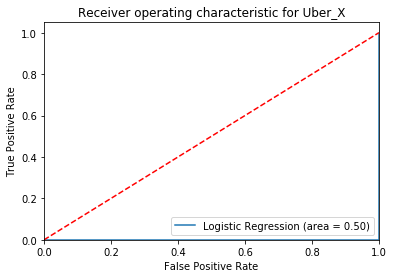

In [107]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

logit_roc_auc = roc_auc_score(y_test_X, logreg_X.predict(X_test_X))
fpr, tpr, thresholds = roc_curve(y_test_X, logreg_X.predict_proba(X_test_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Uber_X')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

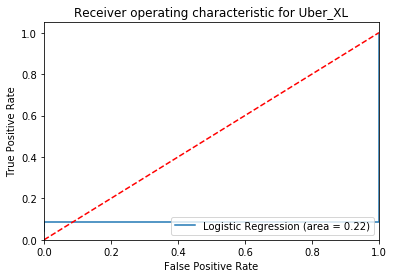

In [108]:
logit_roc_auc = roc_auc_score(y_test_X, logreg_XL.predict(X_test_XL))
fpr, tpr, thresholds = roc_curve(y_test_X, logreg_XL.predict_proba(X_test_XL)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Uber_XL')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()